In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from  lightgbm import LGBMClassifier
from  catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')



In [95]:
plt.style.use('ggplot')

In [96]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Explore Data

In [97]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
data.duplicated().sum()

0

## Data Analysis

In [102]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

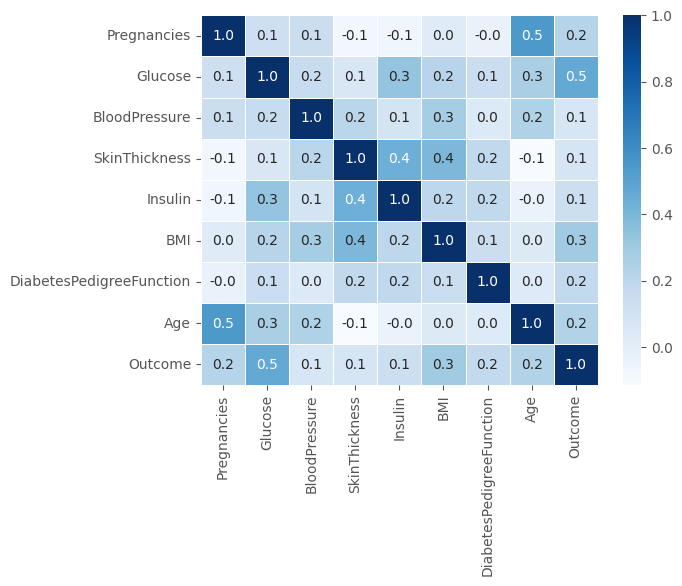

In [103]:
sns.heatmap(data.corr(),annot = True,fmt='0.1f',linewidth=.5,cmap = 'Blues')

<Axes: xlabel='Outcome', ylabel='count'>

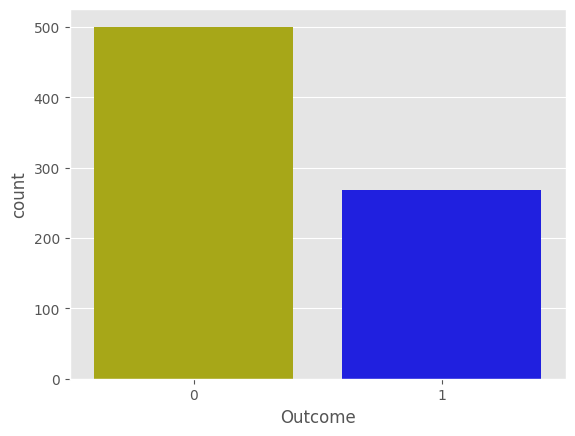

In [104]:
sns.countplot(x=data.Outcome,palette=['y','b'])

<Axes: title={'center': 'this is plot'}, xlabel='Pregnancies', ylabel='count'>

<Figure size 2000x500 with 0 Axes>

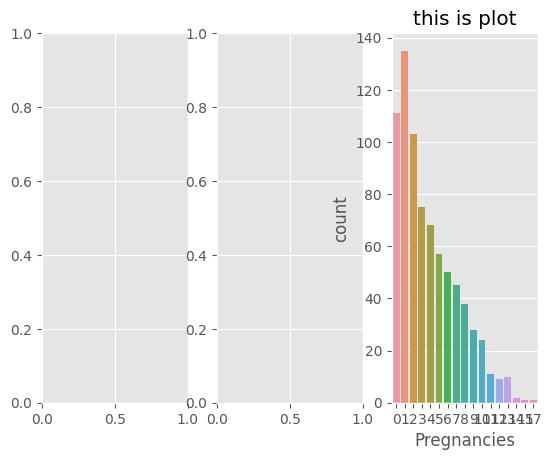

In [105]:
plt.figure(figsize=(20,5))
plt.subplots(1,3)
plt.title('this is plot')
sns.countplot(x=data.Pregnancies)

<Axes: >

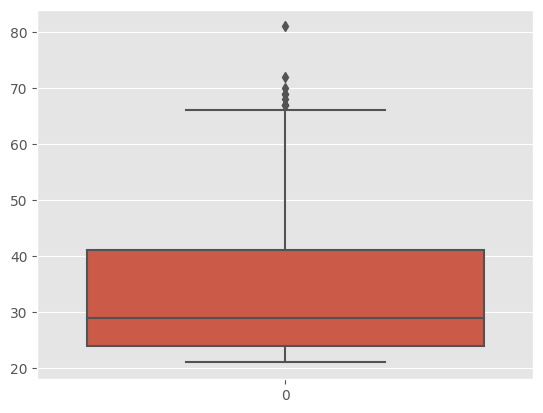

In [106]:
sns.boxplot(data.Age)

## Create Model

In [107]:
X = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,
                                               random_state = 0 )

In [109]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier(n_estimators = 1000)
model5 = XGBClassifier()
model6 = LGBMClassifier()
model7 = CatBoostClassifier()

In [110]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier','LGBMClassifier','CatBoostClassifier']
result1 = []
result2 = []
result3 = []

LogisticRegression()
accuracy is : 0.8246753246753247 recall is : 0.7631578947368421 f1 is : 0.6823529411764706


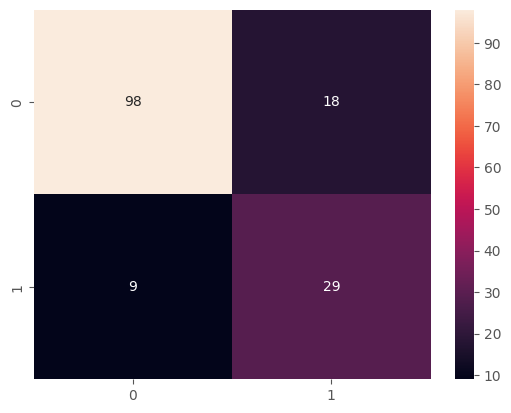

In [111]:
def call(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    accuracy = accuracy_score(pre,y_test)
    recall = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot = True)
    print(model)
    print('accuracy is :',accuracy,'recall is :',recall,'f1 is :',f1)
call(model1)

SVC()
accuracy is : 0.7922077922077922 recall is : 0.7272727272727273 f1 is : 0.5999999999999999


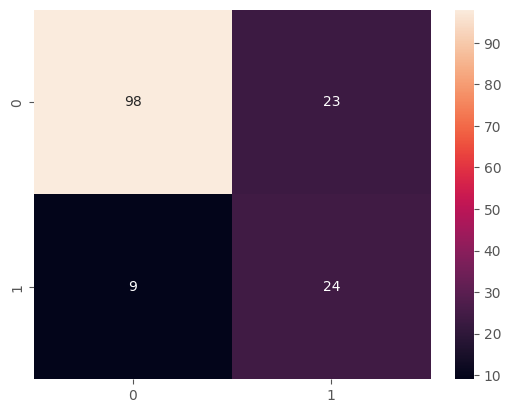

In [112]:
call(model2)

RandomForestClassifier()
accuracy is : 0.8181818181818182 recall is : 0.7317073170731707 f1 is : 0.6818181818181819


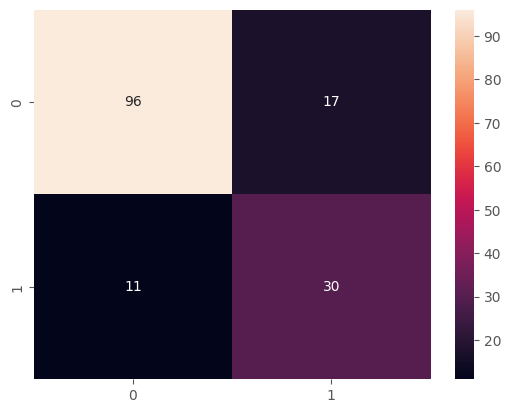

In [113]:
call(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.7662337662337663 recall is : 0.5964912280701754 f1 is : 0.6538461538461539


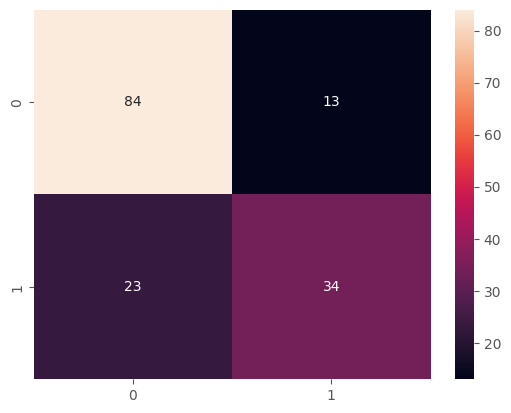

In [114]:
call(model4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
accuracy is : 0.7987012987012987 recall is : 0.6481481481481481 f1 is : 0.6930693069306931


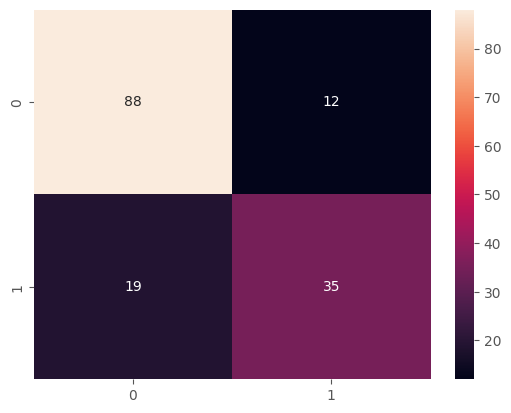

In [115]:
call(model5)

[LightGBM] [Info] Number of positive: 221, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359935 -> initscore=-0.575647
[LightGBM] [Info] Start training from score -0.575647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

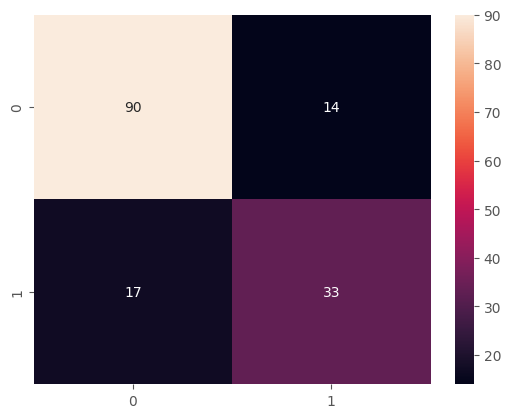

In [116]:
call(model6)

Learning rate set to 0.008365
0:	learn: 0.6885035	total: 1.8ms	remaining: 1.8s
1:	learn: 0.6843131	total: 3.73ms	remaining: 1.86s
2:	learn: 0.6804810	total: 5.62ms	remaining: 1.87s
3:	learn: 0.6764383	total: 7.44ms	remaining: 1.85s
4:	learn: 0.6732255	total: 9.18ms	remaining: 1.83s
5:	learn: 0.6688362	total: 11ms	remaining: 1.82s
6:	learn: 0.6651518	total: 12.9ms	remaining: 1.82s
7:	learn: 0.6619061	total: 14.5ms	remaining: 1.8s
8:	learn: 0.6580451	total: 16.4ms	remaining: 1.8s
9:	learn: 0.6555587	total: 17.5ms	remaining: 1.73s
10:	learn: 0.6520419	total: 19.2ms	remaining: 1.73s
11:	learn: 0.6488285	total: 21ms	remaining: 1.73s
12:	learn: 0.6458347	total: 22.7ms	remaining: 1.72s
13:	learn: 0.6424054	total: 24.4ms	remaining: 1.72s
14:	learn: 0.6393789	total: 27ms	remaining: 1.77s
15:	learn: 0.6357680	total: 28.6ms	remaining: 1.76s
16:	learn: 0.6325922	total: 30.2ms	remaining: 1.75s
17:	learn: 0.6294046	total: 32.1ms	remaining: 1.75s
18:	learn: 0.6271212	total: 33.6ms	remaining: 1.74s
19

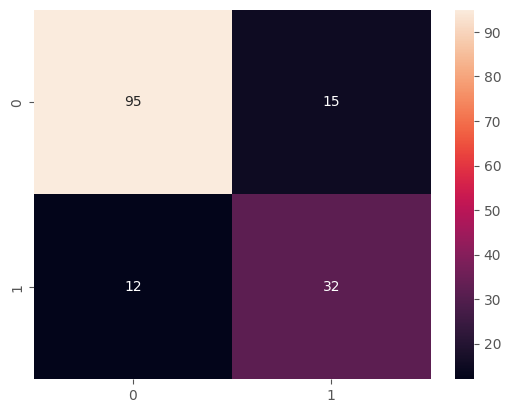

In [117]:
call(model7)

In [118]:
result1

[0.8246753246753247,
 0.7922077922077922,
 0.8181818181818182,
 0.7662337662337663,
 0.7987012987012987,
 0.7987012987012987,
 0.8246753246753247]

In [119]:
result2

[0.7631578947368421,
 0.7272727272727273,
 0.7317073170731707,
 0.5964912280701754,
 0.6481481481481481,
 0.66,
 0.7272727272727273]

In [120]:
result3

[0.6823529411764706,
 0.5999999999999999,
 0.6818181818181819,
 0.6538461538461539,
 0.6930693069306931,
 0.6804123711340208,
 0.7032967032967034]

In [121]:
FinalResult = pd.DataFrame({'Algorithm':columns,'accuracies':result1,'Recall':result2,'f1':result3})

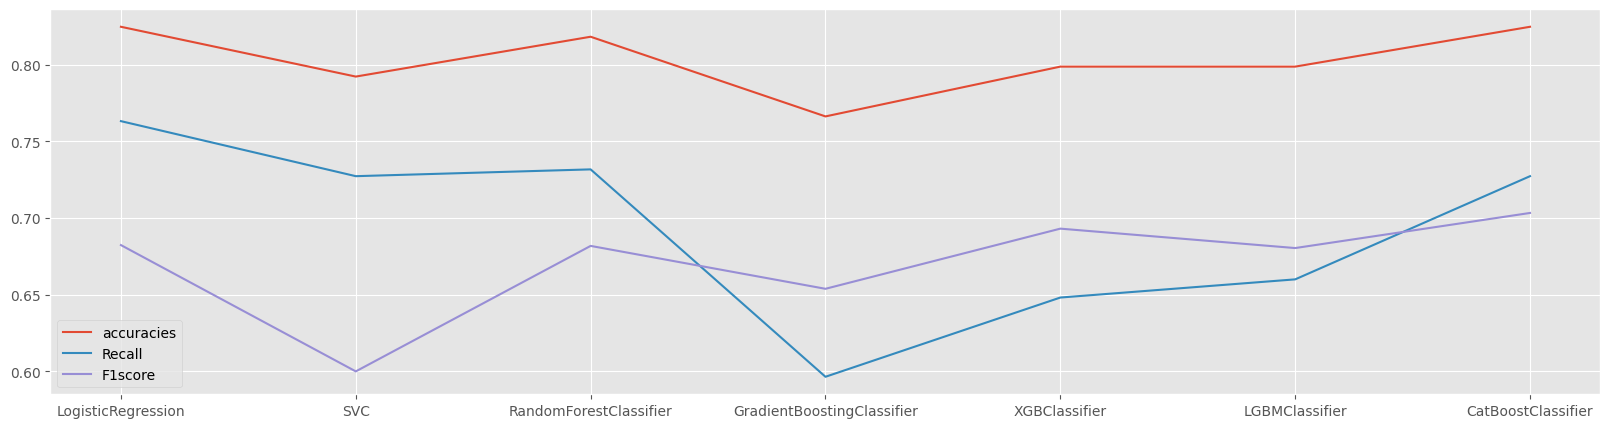

In [122]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result1,label='accuracies')
plt.plot(FinalResult.Algorithm,result2,label='Recall')
plt.plot(FinalResult.Algorithm,result3,label='F1score')
plt.legend()
plt.show()